### Project Assignment on the Human Brain Weight and Head Size

Here I will be exploring the dataset and finding insights. I will also train and test a model with this dataset 

### Lets Begin

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import warnings 
# from future.warnings('ignore')

import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Spatial Visualizations'''
import folium
import folium.plugins

In [2]:
# Read the dataset
data = pd.read_csv("HumanBrain_WeightandHead_size.csv")

In [3]:
data.head(4)

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282


In [4]:
data.tail(3)

,Head Size(cm^3),Brain Weight(grams)
234,3233,1104
235,3352,1170
236,3391,1120


In [5]:
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [7]:
data.isnull().sum()

Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [9]:
data.isna().any()

Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

<Axes: >

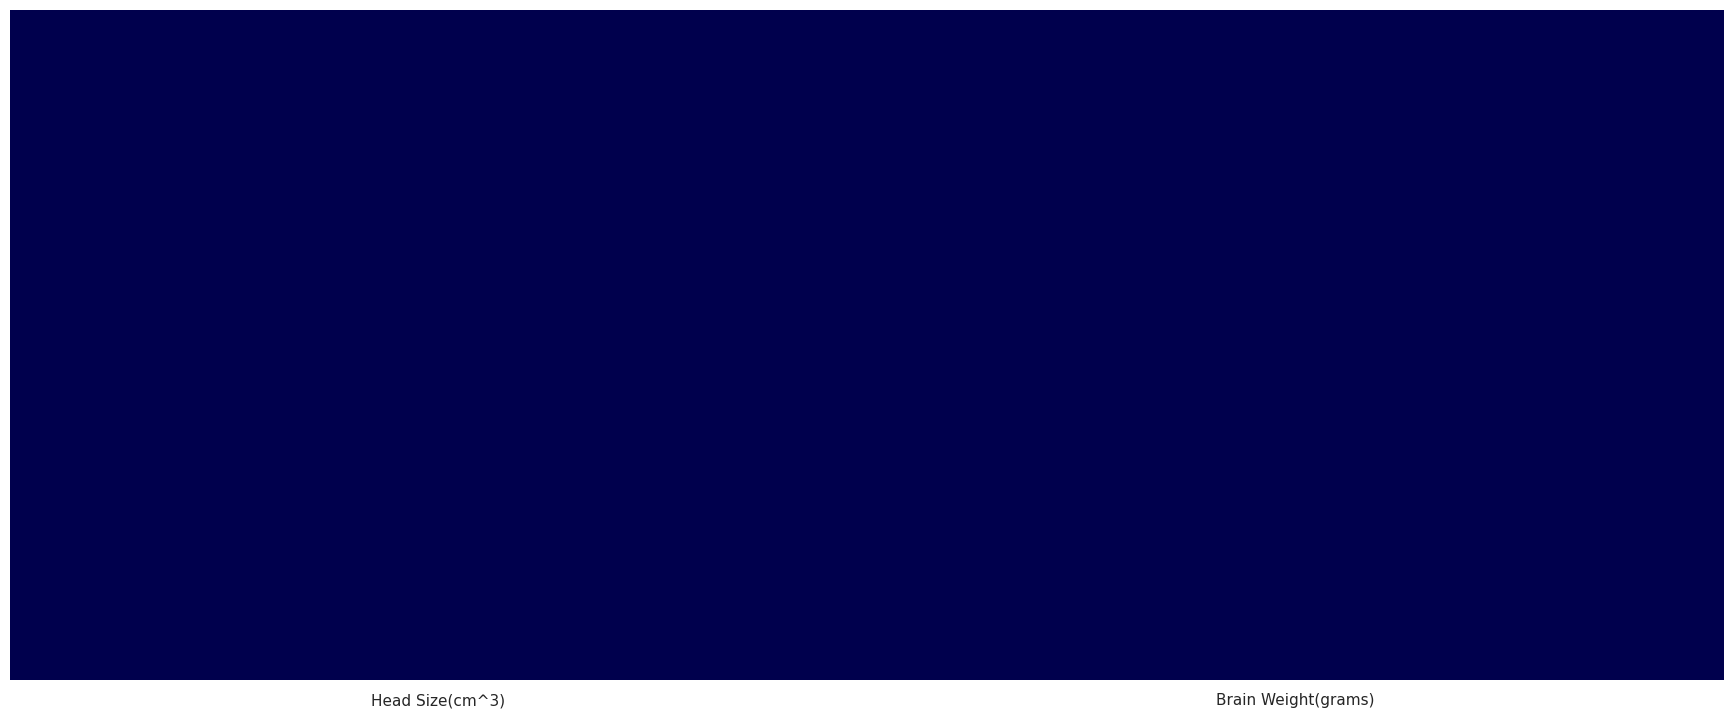

In [10]:
# Creating a heat map for the missing values

sns.set(rc = {'figure.figsize':(19.7,8.27)})

sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ='seismic')

The Heat map confirms that my data has not missing or NaN values

In [12]:
data.columns

Index(['Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

<Axes: xlabel='Brain Weight(grams)', ylabel='Head Size(cm^3)'>

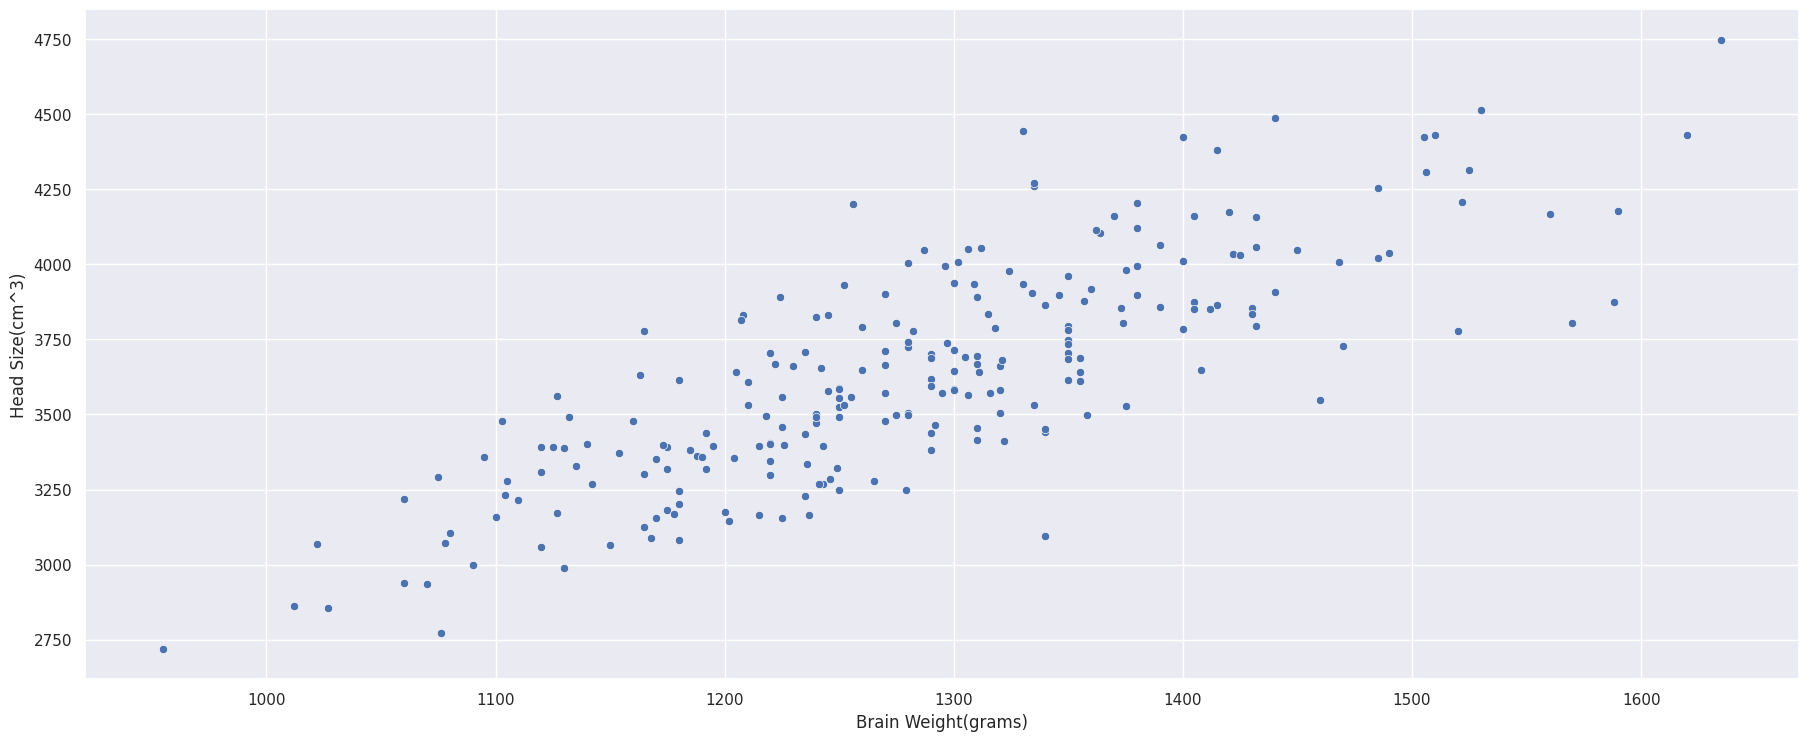

In [16]:
# Plotting a scatterplot for the brain vs the head size
sns.scatterplot(x = 'Brain Weight(grams)', y = 'Head Size(cm^3)', data = data)

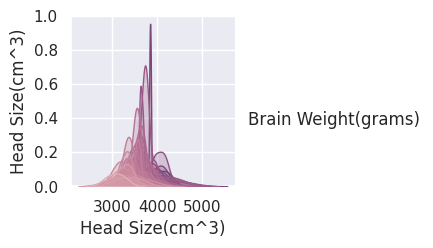

In [17]:
sns.pairplot(data, hue = "Brain Weight(grams)" )
plt.show()

Our Data has only two columns, so we will just go ahead and train 

In [19]:
data2 = data.copy()

In [20]:
data2.head(2)

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297


In [21]:
X = data2.drop(['Brain Weight(grams)'], axis= 1)

In [22]:
y = data2['Brain Weight(grams)']

In [23]:
y.head(2)

0    1530
1    1297
Name: Brain Weight(grams), dtype: int64

### Splitting my data into Train and Testing Dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [26]:
len(X_train)

177

In [27]:
len(X_test)

60

In [29]:
len(y_train)

177

In [30]:
len(y_test)

60

### Linear Regression Model

In [31]:
from sklearn import linear_model

In [32]:
# Preparing my model
lr_model = linear_model.LinearRegression(n_jobs = -1)

In [33]:
# Training my model
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [34]:
predicts = lr_model.predict(X_test)
head_brain = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
head_brain.head()

,Actual Values,Predicted Values
0,1275,1245.225272
1,1405,1345.938040
2,1320,1266.863824
3,1125,1216.373869
4,1400,1321.628062


#### To Calculate the Mean Absolute Error MAE 

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
# Calculate MAE
mae = mean_absolute_error(y_test, predicts)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 56.658067627754676


A lower MAE Simply means better performance